In [13]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from tabulate import tabulate
import numpy as np
import seaborn as sns
import time

In [14]:
df = pd.read_csv("Bases/base_mapa_brasil")

In [15]:
df.head()

,Unnamed: 0,SIGLA_UF,Q092
0,2,AC,NaN
1,6,AC,NaN
2,12,AC,NaN
3,13,AC,NaN
4,14,AC,NaN


In [16]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [17]:
df = df[df['Q092'].notna()]

In [18]:
# Contagem total de registros
total_count = df.shape[0]

print(total_count)

33321


In [19]:
# Filtrando os registros de depressao
df_depressao = df[df['Q092'] == 1]

# Contagem de depressao por estado
cont_depre_estados = df_depressao['SIGLA_UF'].value_counts()

total_por_estado = df['SIGLA_UF'].value_counts()

In [20]:
# Calculando a porcentagem de Depressao por estado em relação ao total de registros
porcentagem_estado = (cont_depre_estados / total_por_estado) * 100

In [21]:
# Calculando a porcentagem de Depressao no Brasil todo
total_Brasil = df_depressao.shape[0]
total_pct_brasil = (total_Brasil / total_count) * 100

In [22]:
# Exibindo os resultados
print("Porcentagem de depressao por estado:")
print(porcentagem_estado)
print("\nPorcentagem de depressao no Brasil todo:")
print(total_pct_brasil)

Porcentagem de depressao por estado:
SIGLA_UF
AC     6.150342
AL     4.864865
AM     3.501946
AP     3.738318
BA     3.579589
CE     5.583438
DF     8.673469
ES     8.411950
GO     7.903403
MA     4.272684
MG    10.487805
MS     9.665072
MT     5.263158
PA     3.195489
PB     6.228374
PE     5.834464
PI     6.200000
PR    10.998553
RJ     7.080243
RN     6.843066
RO     4.766537
RR     3.814433
RS    14.884517
SC    10.199203
SE     6.948640
SP     8.669951
TO     6.172840
Name: count, dtype: float64

Porcentagem de depressao no Brasil todo:
6.839530626331743


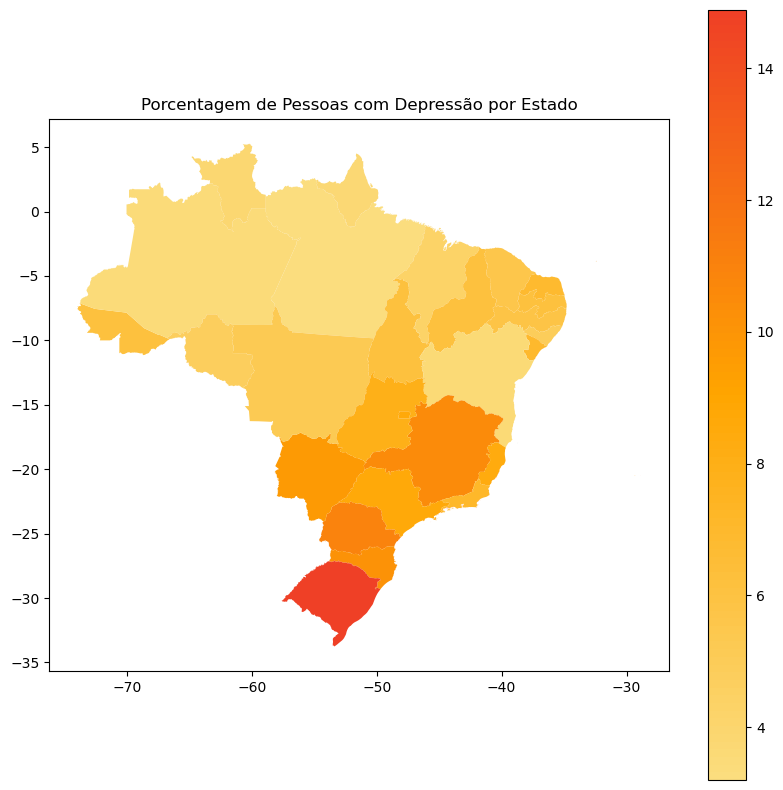

In [27]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

# Carregue o shapefile dos estados brasileiros
shapefile_path = 'BR_UF_2022/BR_UF_2022.shp'
gdf = gpd.read_file(shapefile_path)


# Junte os dados
gdf['Porcentagem_Depressao'] = gdf['SIGLA_UF'].map(porcentagem_estado)

# Normalização dos valores para o mapeamento correto das cores
norm = mcolors.Normalize(vmin=gdf['Porcentagem_Depressao'].min(), vmax=gdf['Porcentagem_Depressao'].max())

# Criar uma nova paleta de cores personalizada que vai do azul claro ao vermelho
colors = ["#FBDD7E", "#FFA500", "#EF4026"]  # Azul claro, azul, vermelho
n_bins = 100  # Número de bins para a paleta de cores
cmap_name = 'custom_coolwarm'
cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)
# Plote o mapa
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(column='Porcentagem_Depressao', cmap=cmap, legend=True, ax=ax)
plt.title('Porcentagem de Pessoas com Depressão por Estado')
plt.show()